# All at odds - part 1

It won't come as a shock to anyone that this is not the only blog on this particular subject. There are many blogs YouTube channels, etc. on the subject of data Science and specifically data Science in Sport and Sports betting. It is interesting when looking at these other resources how different people take different routes, one assumes or at least talks, with the same destination in mind. To date, I have not seen another blog that uses the same starting point as I am about to, though there is a very good chance that there is one out there somewhere.

Historically, the only place to go to put a bet on sports was a bookmaker, in fact until the late 1990s that would have meant visiting a shop for most people. At a bookmaker, you could place a back bet on a particular outcome and that was it. Now, when you visit a bookmaker you have a huge range of different options available to you. Especially in sports like football all where you can bet on everything from the outcome of the match to the number of corners a particular side will have. That is not the only thing that changed in Sports betting because around 2000 betting exchanges were introduced. Exchanges are effectively peer-to-peer betting services where the exchange provides the infrastructure to allow people to exchange bets. Your exchange rate could be against another individual, a syndicate, an organisation, or even a bookmaker, you just don't know as you'll never see the other side of the bet. The other thing that changed with the advent of betting exchanges was that you can now bet on something not happening, i.e. you can bet against a particular team winning rather than just backing them to win.

My journey into the analysis of Sports Betting will begin with looking at the accuracy of the odds at the beginning of a particular event. The odds offered by individual bookmakers tend to match closely those offered by other bookmakers and those offered at the exchanges. This needs to be the case otherwise there would be the potential for bettors to exploit differences in prices between different bookmakers and exchanges. That technique is known as arbitrage betting. The price that is available just before the commencement of a particular event it's probably as close as the real probability of a particular outcome for that event, for two very good reasons. Where the price is being set by pressure from an exchange, then we have the "wisdom of the crowd" coming into play. There could be thousands of individuals looking for value that will drive the price to a balance point of maximum value. The second reason, where the price is being driven by pressure from bookmakers then their experience will come into play. This knowledge over many many years, plus, no doubt, the data scientists that they employ to calculate real probability, leads to the price at that particular point in time will be as close to real as possible.

Therefore, my opening question is . . .

# How accurate are the starting odds set for a market in a particular event?

I will be using the starting prices from a bookmaker for this particular exercise, but that's only due to the availability of the data and is not a reflection of the perceived accuracy of that data. Should data from betting exchanges for the same event start to be collected then there will be very little difference between not and the data we have used. The first analysis will be to look at match odds data, i.e. Home win away win what draws in Premier League football matches between 2010 and 2021.

The analysis is undertaken with the data used in the previous set downloaded from 

**[FootballData.co.uk](https://www.football-data.co.uk/data.php)**  

First with the English Premiership between 2010 and 2021, then we can look at other leagues.

In [15]:


# load dependencies and data
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#load all csv files and append to a single dataframe
path = '../../../GitHub/England-EPL' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

footdata = pd.concat(li, axis=0, ignore_index=True)

footdata.rename(columns={'B365H': 'Home odds',
                            'B365A': 'Away odds',
                              'B365D': 'Draw odds'},
                     inplace=True, errors='raise')

#check that the data is loaded and see how it looks
footdata

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,E0,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,H,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
4419,E0,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,H,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
4420,E0,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,H,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
4421,E0,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,H,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


In [16]:


# to make the dataframe more manageable and readable let's select only the columns we want to analyse

footdata_odds = footdata[['FTR','Home odds','Away odds','Draw odds']]

footdata_odds

,FTR,Home odds,Away odds,Draw odds
0,H,2.00,4.0,3.30
1,H,2.88,2.5,3.25
2,D,2.20,3.4,3.30
3,H,1.17,17.0,7.00
4,D,2.10,3.6,3.30
...,...,...,...,...
4418,H,1.14,15.0,8.50
4419,H,1.44,6.5,5.00
4420,H,2.80,2.4,3.60
4421,H,1.65,5.0,4.00


In [17]:


# there are some NaN values in the dataframe. Here are the counts per column

footdata_odds.isna().sum()



FTR          1
Home odds    1
Away odds    1
Draw odds    1
dtype: int64

We will initially look at this data via a Boxplot. Boxplot is similar to a candle chart for anyone who has done any technical charting. What a Boxplot does is give us a Box showing where the majority of the data is while showing outliers as lines and dots. In this way, we can see where the majority of the data sits.

The main Box in a Boxplot shows all data from the Q1 or 25th percentile to the Q3 or 75th percentile. Using a Boxplot we can see how closely grouped the data or in this case the starting odds are. The lines and dots above and below these levels will show how spread out the rest of the data is. With this technique, we will be able to get a good picture of where the starting odds are in relation to each outcome and thus an idea of the accuracy of the odds.

We will look at 3 Boxplots - one for each of the 3 possible outcomes. To do this we will split the odds dataset we just created into 3.

In [11]:

#create a table with a subset of the data for Home win, Away win and Draw
footdata_odds_h = footdata_odds.loc[footdata_odds['FTR'] == "H"]
footdata_odds_a = footdata_odds.loc[footdata_odds['FTR'] == "A"]
footdata_odds_d = footdata_odds.loc[footdata_odds['FTR'] == "D"]

<AxesSubplot:title={'center':'Starting odds for home wins'}>

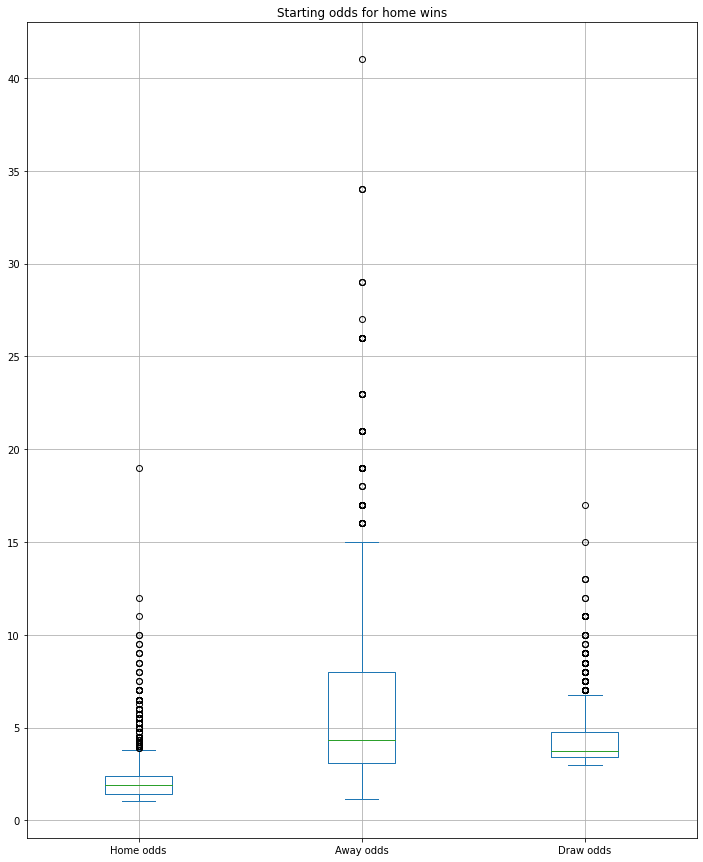

In [12]:


#plot the boxplot for games that ended a home win. Nice and big, so we can get a good look at the data.
footdata_odds_h.plot(kind='box', figsize=(12,15),title=('Starting odds for home wins'),grid='TRUE')


Now we know what a Boxplot looks like then let's have a more detailed explanation of what the elements are. Looking first at the box, the horizontal line in the middle represents the 50% point of the data numbers, the median. From the median line to the bottom of the box is 50% to 25% of data points, while the top part of the box is 50% to 75% of data points. The box, i.e. 25% to 75% of data points is known as the interquartile range. 

The lines emanating from the top and bottom of the boxes are known as whiskers and represent the top (75%+) and bottom (25%-) of the data points. The bar across the whiskers is set at (1.5 * Interquartile Range) and the dots above and below these are the Outliers. The Outliers will generally cover approx 0.7% of data values, i.e. 0.35% highest and lowest values in the range.

With the above in mind, how to interpret the Boxplot. The obvious feature is that for Home wins the vast majority of Home odds fall below those of the Away win and the Draw. This is the first area of further identification that we have identified. Before we do though, let's have a look at the same plots for Away wins and Draws as the outcome.

<AxesSubplot:title={'center':'Starting odds for away wins'}>

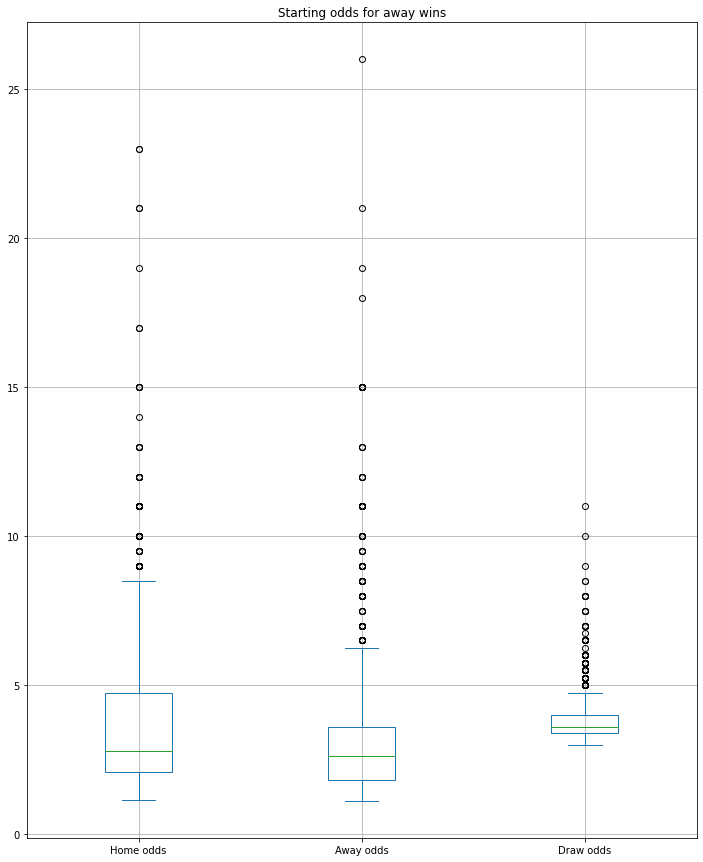

In [13]:


#let's plot the boxplot for games that ended as an away win. 
footdata_odds_a.plot(kind='box',figsize=(12,15),title=('Starting odds for away wins'),grid='TRUE')

<AxesSubplot:title={'center':'Starting odds for draws'}>

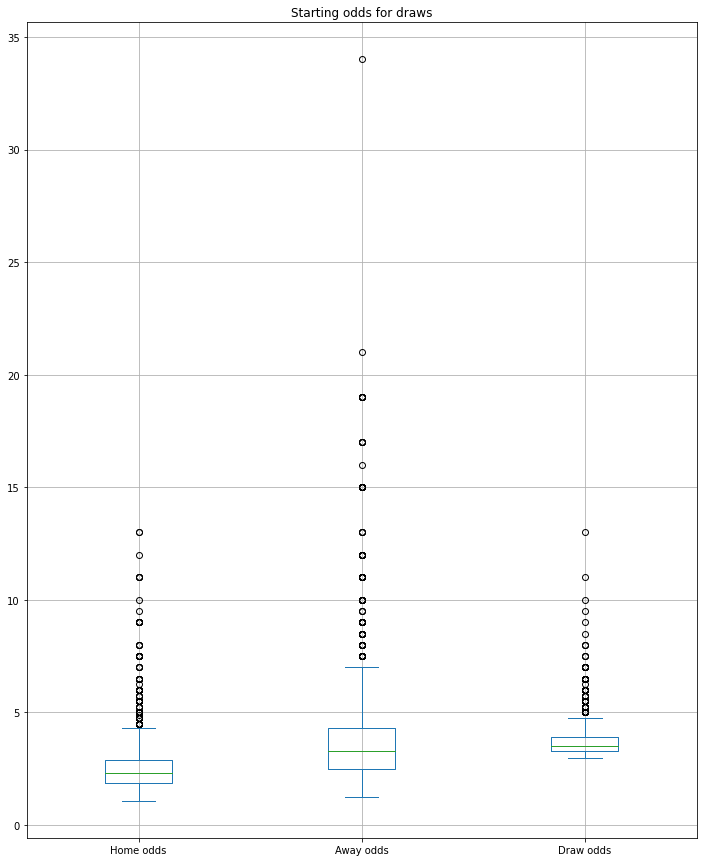

In [14]:


#let'In the Boxplots for Away wins and Draws the overlap of odds is much more pronounced than for the Home wins we looked at earlier. It would be fair to say at this stage that for Away wins and Draws odds alone would not be a sufficient distinguishing factor to develop any conclusions from. Another variable would be required to provide clearer results. That leaves us with the further analysis of the Home win odds in relation to Home win outcomes.s plot the boxplot for games that ended a home win. Nice and big, so we can see the outcome.
footdata_odds_d.plot(kind='box',figsize=(12,15),title=('Starting odds for draws'),grid='TRUE')

In the Boxplots for Away wins and Draws the overlap of odds is much more pronounced than for the Home wins we looked at earlier. It would be fair to say at this stage that for Away wins and Draws odds alone would not be a sufficient distinguishing factor to develop any conclusions from. Another variable would be required to provide clearer results. That leaves us with the further analysis of the Home win odds in relation to Home win outcomes.

That will be our starting point for part 2 of this series on using starting odds for analysis of outcome. 